# Simple example reconstructing the sin function


## Imports and dataset

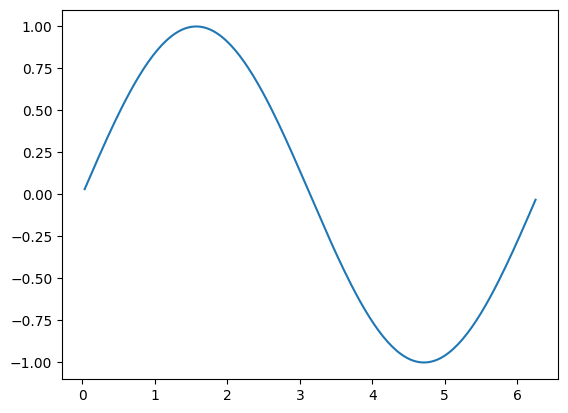

In [4]:
import HPO

import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

X = []
Y = []

num_samples = 200

for i in range(1, num_samples):
    X.append(2.0*math.pi/num_samples * float(i))
    Y.append(math.sin(2.0*math.pi/num_samples * float(i)))

plt.plot(X, Y)
plt.show()

X = torch.Tensor(X)
Y = torch.Tensor(Y)

dataset = HPO.Dataset(X, Y)


## Grid search

Best result:
-4.0676481793008685
Corresponding parameters:
{'batch_size': 40, 'epochs': 1}


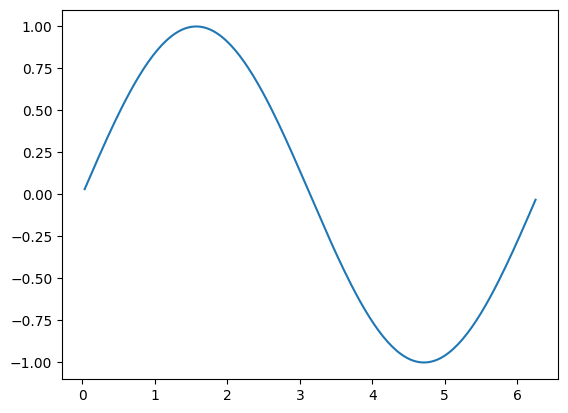

In [5]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(1,), activation='relu'))
    model.add(Dense(1, activation=None))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasRegressor(model=create_model, verbose=0)

hyperparameterspace = {
    'batch_size' : [10, 20, 40],
    'epochs': [1, 20, 40, 60]
}

optimization = HPO.Optimization(dataset, model, hyperparameterspace, type=0)
result = optimization.fit()
print("Best result:")
print(result.best_score_)
print("Corresponding parameters:")
print(result.best_params_)

Y_predicted = result.predict(torch.Tensor(X).reshape(-1, 1))

plt.plot(X,Y)
plt.show()

## Random search

Best result:
-16.206743844560936
Corresponding parameters:
{'epochs': 1, 'batch_size': 40}


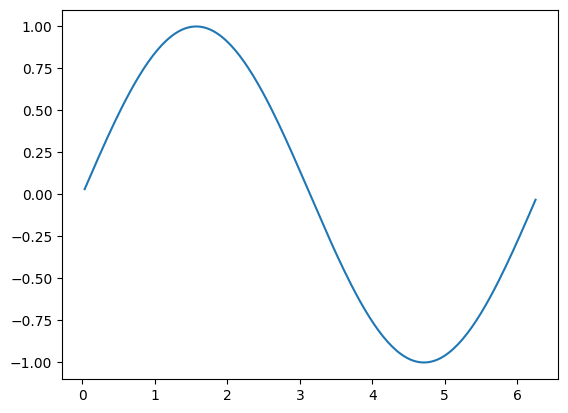

In [6]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(1,), activation='relu'))
    model.add(Dense(1, activation=None))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasRegressor(model=create_model, verbose=0)

hyperparameterspace = {
    'batch_size' : [10, 20, 40],
    'epochs': [1, 20, 40, 60]
}

optimization = HPO.Optimization(dataset, model, hyperparameterspace, type=1)
result = optimization.fit()
print("Best result:")
print(result.best_score_)
print("Corresponding parameters:")
print(result.best_params_)

Y_predicted = result.predict(torch.Tensor(X).reshape(-1, 1))

plt.plot(X,Y)
plt.show()